# Prepare data

In [3]:
from keras.datasets import mnist

In [4]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11501568/11490434 [==============================] - 7s 1us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels.shape

(10000,)

As we will build a shallow fully  connected layer of NN we expect the input to be  1D so we will flatten 28*28 image to

1D by multiplying it.

In [12]:
train_images=train_images.reshape(60000,28*28)
train_images=train_images.astype('float32')/255

In [13]:
test_images=test_images.reshape(10000,28*28)
test_images=test_images.astype('float32')/255

In [14]:
train_images.shape

(60000, 784)

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
train_labels=to_categorical(train_labels)

In [20]:
train_labels.shape

(60000, 10)

# Model Building

In [21]:
from tensorflow.keras import models , layers


In [24]:
model=models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(512,activation='relu',))
model.add(layers.Dense(10,activation='softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# Model fitting

In [36]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
model.fit(x=train_images,y=train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2247 - accuracy: 0.9329
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0801 - accuracy: 0.9756
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0507 - accuracy: 0.9837
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0350 - accuracy: 0.9889
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0259 - accuracy: 0.9914


In [39]:
test_labels=to_categorical(test_labels)

In [40]:
test_acc,test_loss=model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0682 - accuracy: 0.9801


In [43]:
import matplotlib.pyplot as plt
import numpy as np

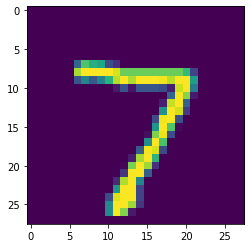

In [44]:
img = test_images[0]
plt.imshow(np.reshape(img, (28,28)))


In [49]:
predictions=model.predict(np.reshape(img, (1,784)))

In [50]:
np.argmax(predictions)

7